# Codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run 'Color_and_Legends.ipynb'

In [3]:
%run 'Plotting_Tools.ipynb'

In [4]:
%run 'Load_Delay_Data_Frame.ipynb'

In [5]:
stations = pd.read_csv('../stations_ridership.csv')

## All the top codes

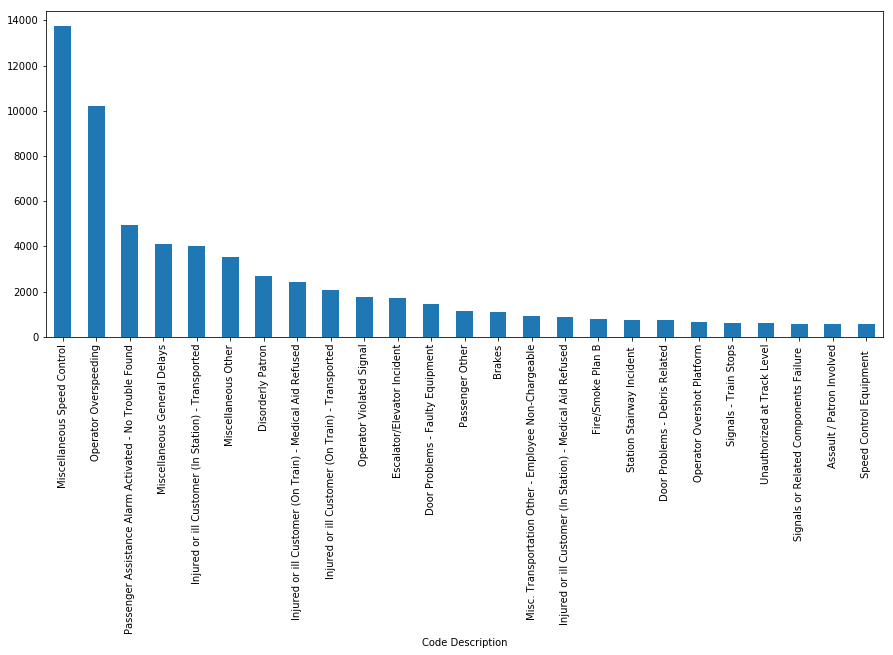

In [6]:
all_top_codes = ttc.groupby('Code Description').size().sort_values(ascending=False)
all_top_codes.head(20)
all_top_codes[:25].plot.bar(figsize=[15,6])
plt.show()

## Top codes by line

In [7]:
groups = ttc.groupby(['Line'], as_index=False)
final = {}
top_codes = []
for title, g in groups:
    group_by = g.groupby('Code Description').size().sort_values(ascending=False).head(10)
    final[title] = group_by
    top_codes = top_codes + list(group_by.index)
    
top_codes = set(top_codes)

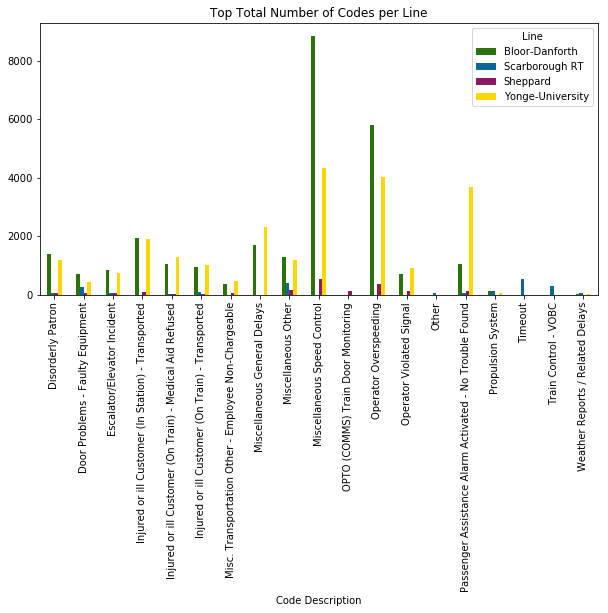

In [8]:
line_top_codes = ttc[ttc['Code Description'].isin(top_codes)].groupby(['Line', 'Code Description']).size().sort_values(ascending=False)
line_top_codes = line_top_codes.unstack().T
line_top_codes.plot.bar(color= colors, figsize=[10,5], title='Top Total Number of Codes per Line')
plt.show()

Some codes are pretty common across lines: Miscellaneous Other /Passenger Assistance Alarm Activated - No Trouble Found

While others are more unique: Weather Reports / Related Delays -- scar
Propulsion System, Train Control - VOBC, Timeout

What about if we look at total time of each delay

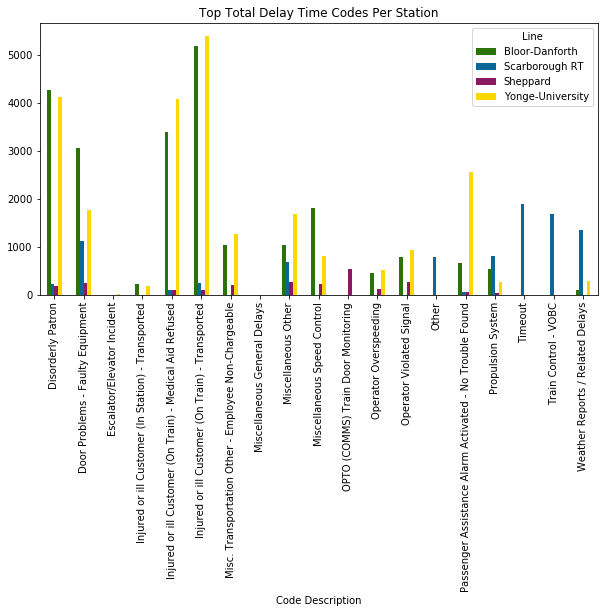

In [9]:
line_top_codes = ttc[ttc['Code Description'].isin(top_codes)].groupby(['Line', 'Code Description'])['Min Delay'].sum().sort_values(ascending=False)
line_top_codes = line_top_codes.unstack().T
line_top_codes.plot.bar(color= colors, figsize=[10,5], title='Top Total Delay Time Codes Per Station')
plt.show()

It looks like the most common delays are things like misc speed control/operators over speeding

But the delays that cause the longest delays are passenger realted -- Injuries, Service Alarms, 
Disorderly patrons

### Outdoor/Indoor Codes

In [10]:
surface = stations[stations['Grade'] == 'Surface']
underground = stations[stations['Grade'] == 'Underground']
elevated = stations[stations['Grade'] == 'Elevated']

In [11]:
def get_delays_for_grade(stations):
    delays = ttc[ttc['Station'].isin(stations['Station'])]
    return delays.groupby('Code Description').size().sort_values(ascending = False)

### Outdoor Codes

In [12]:
surface_codes = get_delays_for_grade(surface)[:15]
# surface_codes

### Undergound Codes

In [13]:
underground_codes = get_delays_for_grade(underground)[:15]
# underground_codes

## Elavated Codes

In [14]:
elevated_codes = get_delays_for_grade(elevated)[:15]
# elevated_codes

In [15]:
grade_station = ttc.merge(stations, on='Station')
grade_top_codes = set(list(surface_codes.index) + list(underground_codes.index) + list(elevated_codes.index))

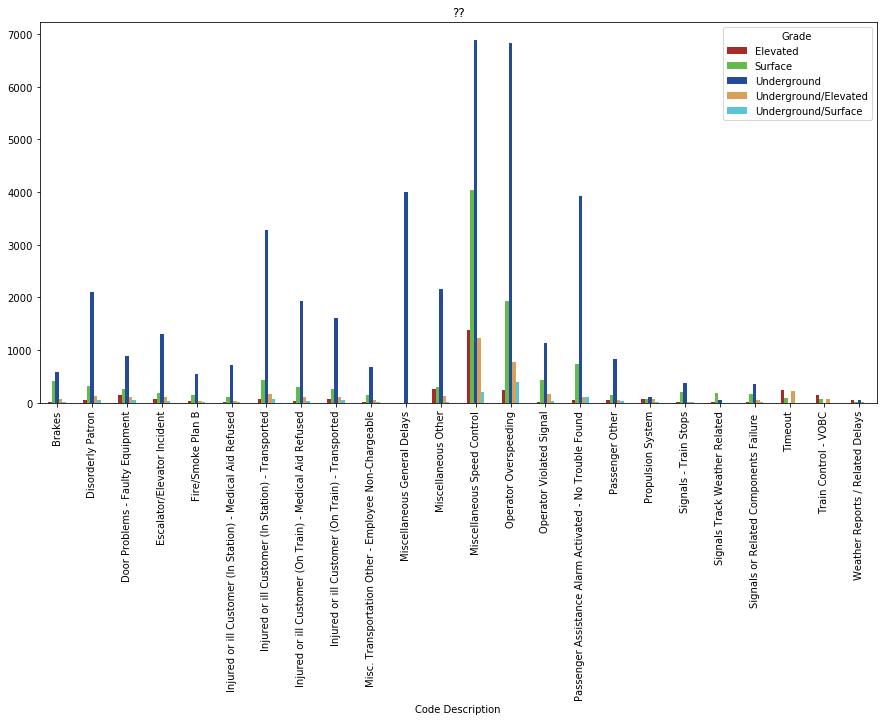

In [16]:
grade_top_codes_grouped = grade_station[grade_station['Code Description'].isin(grade_top_codes)].groupby(['Grade', 'Code Description']).size().sort_values(ascending=False)
grade_top_codes_grouped = grade_top_codes_grouped.unstack().T
grade_top_codes_grouped.plot.bar(color= grade_colors, figsize=[15,7], title='??')
plt.show()

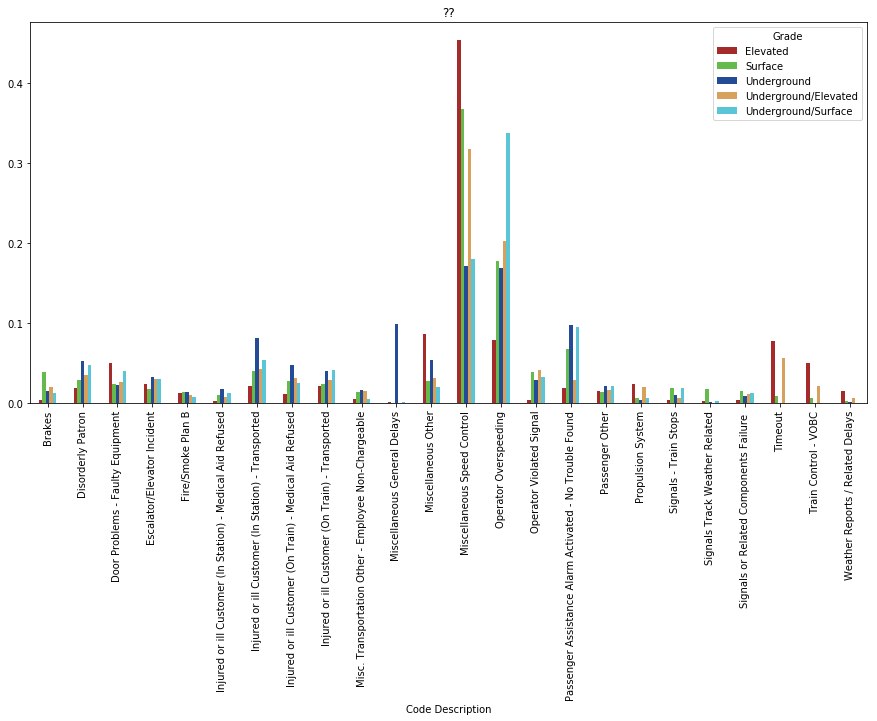

In [17]:
top_grade_delays = grade_station[grade_station['Code Description'].isin(grade_top_codes)]
grade_top_codes_percent_grouped = top_grade_delays \
    .groupby(['Grade', 'Code Description']).size() \
    / top_grade_delays.groupby('Grade').size()
    
        #.sort_values(ascending=False) \

grade_top_codes_percent_grouped = grade_top_codes_percent_grouped.unstack().T
grade_top_codes_percent_grouped.plot.bar(
    color=grade_colors, figsize=[15, 7], title='??')
plt.show()

Interestingly looks like we have different types of issues at the surface more signal issues happen here as well as Ice / Snow Related Problems

### End of the line codes

In [18]:
endline_stations = ['FINCH', 'SHEPPARD - SHP', 'DOWNSVIEW', 'KENNEDY - BD', 'KENNEDY - SRT', 'KIPLING', 'MCCOWAN', 'DON MILLS']

In [19]:
endline_delays = ttc[ttc['Station'].isin(endline_stations)]

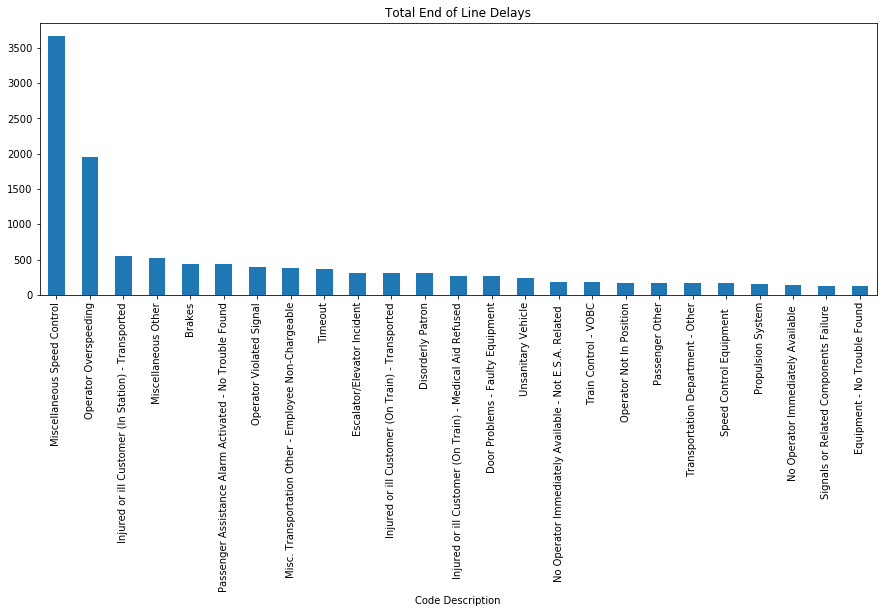

In [20]:
endline_codes = endline_delays.groupby('Code Description').size().sort_values(ascending = False)
endline_codes[:25].plot.bar(figsize=[15,5], title='Total End of Line Delays')
plt.show()

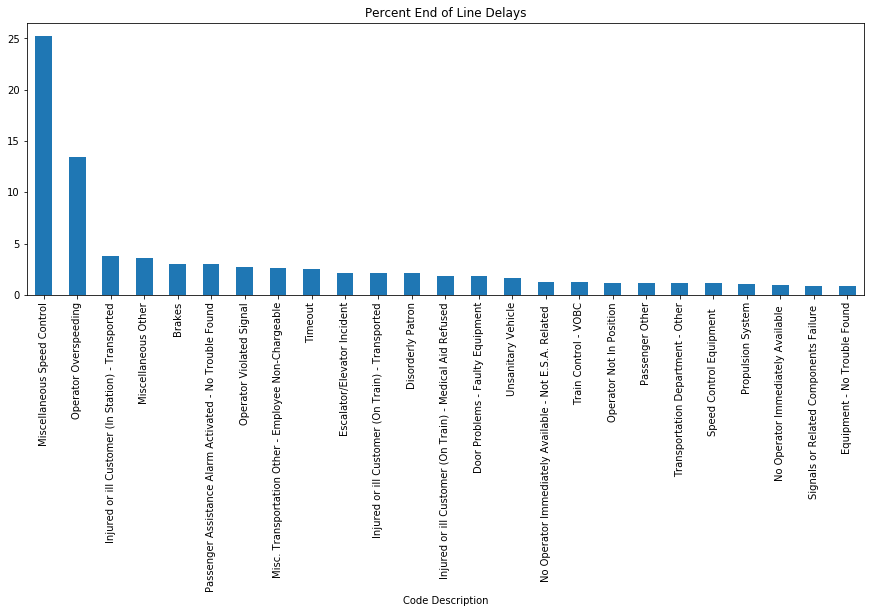

In [21]:
endline_codes_precent = endline_delays.groupby('Code Description').size().apply(lambda x: float(x) / endline_delays.groupby('Code Description').size().sum()*100)
endline_codes_precent.sort_values(ascending=False)[:25].plot.bar(figsize=[15,5], title="Percent End of Line Delays")
plt.show()

Looks like quite a few unique codes here -- 'Unsanitary Vehicle' / 'Timeout', '

## Year to year

In [22]:
ttc['Year'] = ttc['Date'].dt.year
codes_2014 = ttc[ttc['Date'].dt.year == 2014]
codes_2015 = ttc[ttc['Date'].dt.year == 2015]
codes_2016 = ttc[ttc['Date'].dt.year == 2016]
codes_2017 = ttc[ttc['Date'].dt.year == 2017]

**TODO** Percentages here would be really useful

In [23]:
groups = ttc.groupby(['Year'], as_index=False)
final = {}

for title, g in groups:
    final[title] = g.groupby('Code Description').size() \
        .apply(lambda x: float(x) / g.groupby('Code Description').size().sum() * 100) \
        .sort_values(ascending=False).head(20)

final_df = pd.DataFrame(final)
final_df.head()

,2014,2015,2016,2017
Assault / Patron Involved,NaN,NaN,NaN,1.046926
Brakes,1.160737,2.051282,1.315280,1.195426
Disorderly Patron,3.391370,2.967711,3.868472,4.336204
Door Problems - Debris Related,1.054756,0.868946,0.831721,1.232551
Door Problems - Faulty Equipment,2.311380,2.046534,1.697292,1.544402


Fire/Smoke Plan B goes down


Injured or ill Customer (In Station) - Medical Aid Refused / Injured or ill Customer (In Station) - Medical Aid Refused go up BUT

Injured or ill Customer (On Train) - Medical Aid Refused/Injured or ill Customer (On Train) - Transported go down

Operator Overshot Platform go down

### Delays and Codes

Which codes have the longest average delays and cause the longest delays

In [24]:
codes_average_delay = ttc.groupby('Code Description')['Min Delay'].mean().sort_values(ascending=False)[:25]

In [25]:
codes_total_delay = ttc.groupby('Code Description')['Min Delay'].sum().sort_values(ascending=False)[:25]

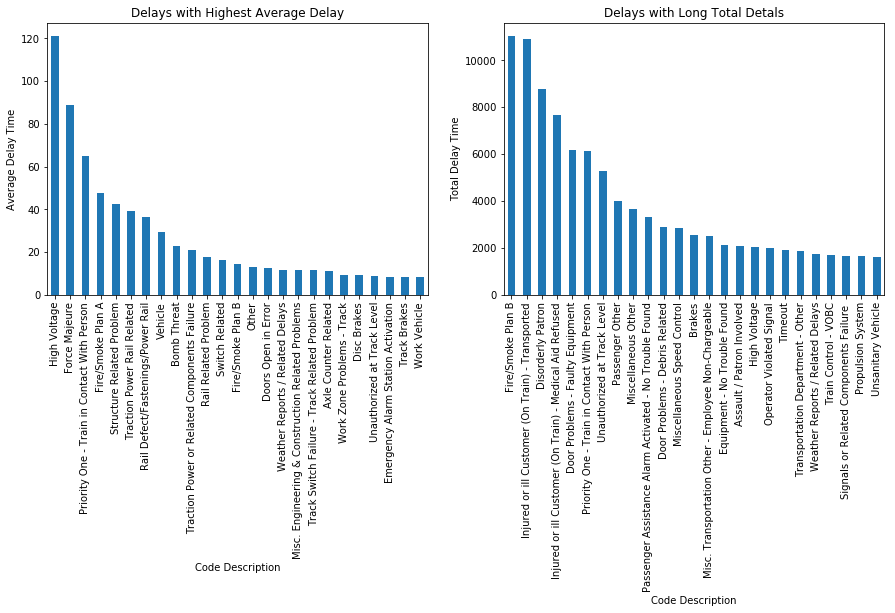

In [26]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
codes_average_delay.plot.bar(ax=ax[0], title='Delays with Highest Average Delay')
ax[0].set_ylabel('Average Delay Time')
codes_total_delay.plot.bar(ax=ax[1], title='Delays with Long Total Detals')
ax[1].set_ylabel('Total Delay Time')
plt.show()

**Voltage**, **Force Majeure**, **Contact With Train** **Fire and Smoke** all are the delays 
that take the most time individually to resolve

While **Fire/Smoke** **Ill Customer**, **Disorderly Patrol** are the cases that take up the most total time

### Fire and Smoke + High Voltage

In [27]:
def plot_number_of_code(code, ax, c = colors):
    group = ttc[ttc['Code Description'] == code].groupby('Line').size()
    group.plot.bar(color=c, title=code, ax=ax)
    return group

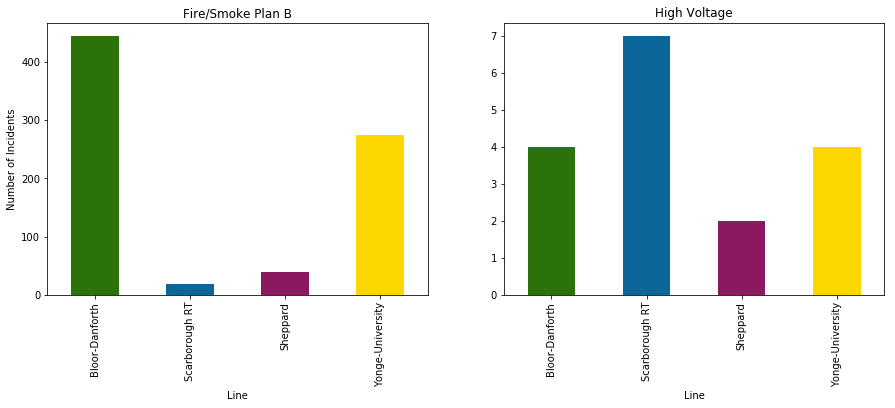

In [28]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
fire_smoke = plot_number_of_code('Fire/Smoke Plan B', ax[0])
high_volgate = plot_number_of_code('High Voltage', ax[1])
ax[0].set_ylabel('Number of Incidents')
plt.show()

## Force Majeure / Priority One - Train in Contact with Person

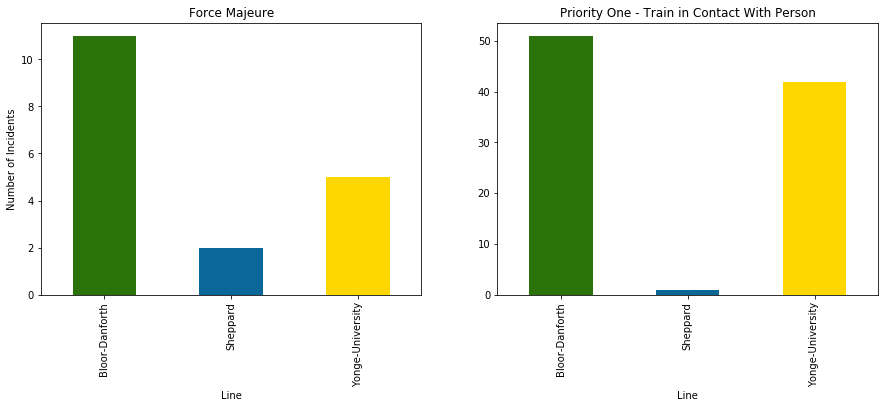

In [29]:
color_subset = colors[0:2] + [colors[3]]

fig, ax = plt.subplots(1,2, figsize=[15,5])
fire_smoke = plot_number_of_code('Force Majeure', ax[0], color_subset)
high_volgate = plot_number_of_code('Priority One - Train in Contact With Person', ax[1], color_subset)
ax[0].set_ylabel('Number of Incidents')
plt.show()